In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

## Fractals from long term behaviour of chaotic systems

In this part we compute the attractor of $f(x) = rx(1 - x)$ for different values of $r$. The entire bifurcation diagram is shown below. Computing the attractor for fixed $r$ is equivalent to choosing a slice of the diagram

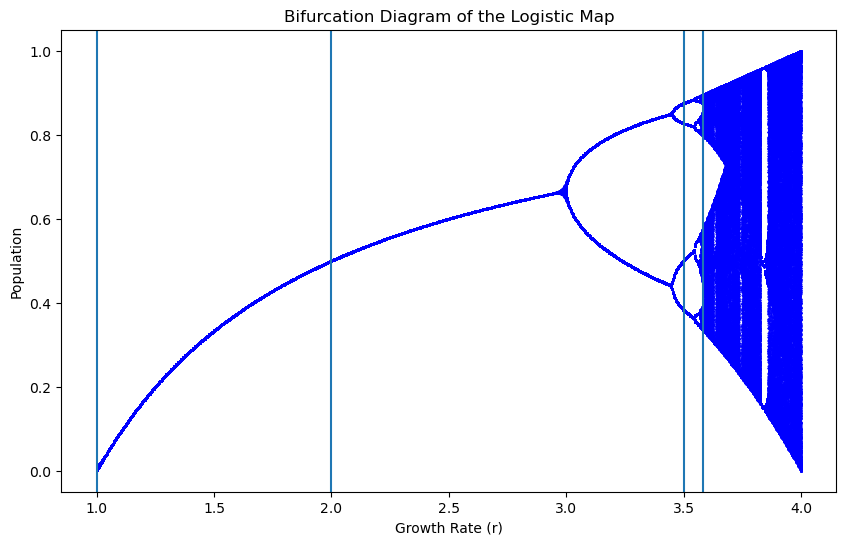

In [2]:

def plot_bifurcation_diagram(r_values, x0, num_iterations_per_point, skip_iterations=100):
    plt.figure(figsize=(10, 6))

    for r in r_values:
        x = x0
        for _ in range(skip_iterations):
            x = r * x * (1 - x)       
        
        x_values = []
        for _ in range(num_iterations_per_point):
            x = r * x * (1 - x)
            x_values.append(x)
        
        plt.plot([r] * len(x_values), x_values, 'b.', markersize=1)

    plt.title('Bifurcation Diagram of the Logistic Map')
    plt.xlabel('Growth Rate (r)')
    plt.ylabel('Population')
    plt.axvline(x = 1)
    plt.axvline(x = 2)
    plt.axvline(x = 3.5)
    plt.axvline(x = 3.58)
    
    ax = plt.gca()
    #ax.set_xlim(3.5, 4)
    #ax.set_ylim(0.7, 1)
    plt.show()

# Specify the range of growth rates (r values) and other parameters
r_values = np.linspace(1, 4.0, 1000)  # Adjust the range as needed
x0 = 0.2
num_iterations_per_point = 1000

# Generate and plot the bifurcation diagram
plot_bifurcation_diagram(r_values, x0, num_iterations_per_point)


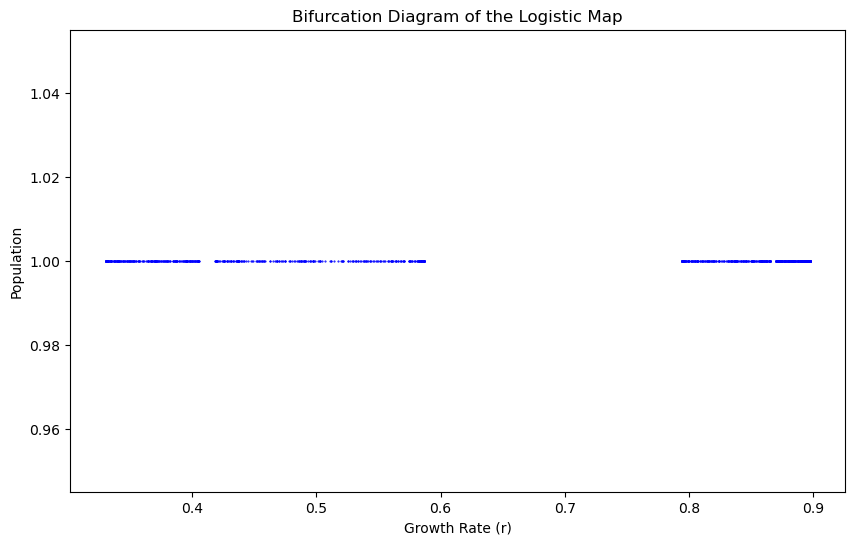

In [3]:
def plot_bifurcation_diagram(r_value, x0, num_iterations_per_point, skip_iterations=100):
    plt.figure(figsize=(10, 6))
    x = x0
    for _ in range(skip_iterations):
        x = r_value * x * (1 - x)       
        
    x_values = []
    for _ in range(num_iterations_per_point):
        x = r_value * x * (1 - x)
        x_values.append(x)
        
    plt.plot( x_values, np.ones(len(x_values)), 'b.', markersize=1)

    plt.title('Bifurcation Diagram of the Logistic Map')
    plt.xlabel('Growth Rate (r)')
    plt.ylabel('Population')
    ax = plt.gca()
    plt.show()

# Specify the range of growth rates (r values) and other parameters
x0 = 0.2
num_iterations_per_point = 1000

# Generate and plot the bifurcation diagram
plot_bifurcation_diagram(3.59, x0, num_iterations_per_point)

## Brownian motion

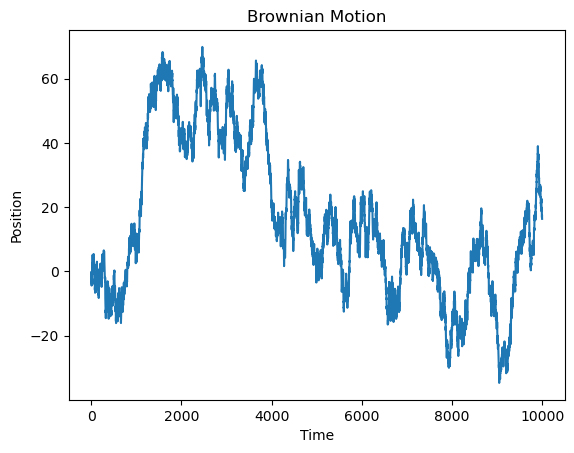

In [11]:
def brownian_motion():
    num_steps = 10000;
    rng = np.random.default_rng(12345)
   
    steps = rng.normal(loc=0, scale=1, size=num_steps)
    
    # Calculate cumulative sum to get the Brownian motion
    brownian_path = np.cumsum(steps)
    
    return brownian_path


brownian_path = brownian_motion()

# Plot the Brownian motion
plt.plot(brownian_path)
plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

Zoom in the following rectangle

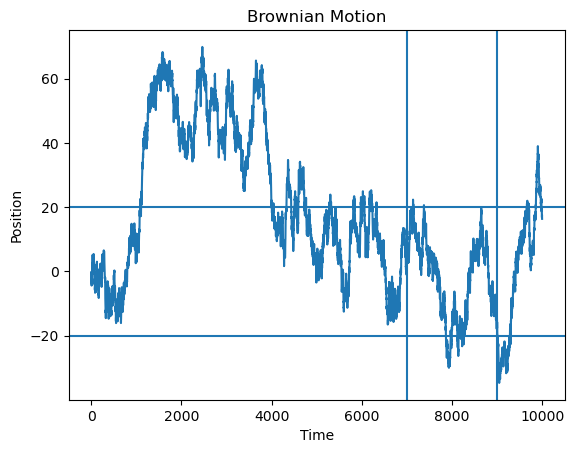

In [5]:
plt.plot(brownian_path)
plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.axvline(x = 7000)
plt.axvline(x = 9000)
plt.axhline(y = 20)
plt.axhline(y = -20)

plt.show()

(-22.0, 20.0)

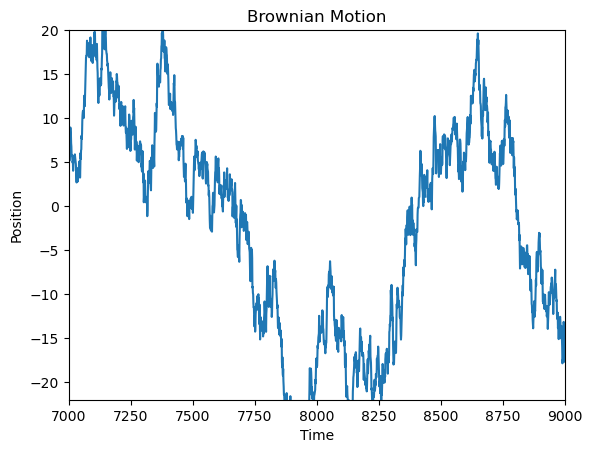

In [12]:
plt.plot(brownian_path)
plt.title('Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xlim(7000, 9000) 
plt.ylim(-22, 20)

## Fractals from iterated maps
In this section we explain the creation of the Mandelbrot set

In [14]:
def iterate_map(z, max_iter):
    c = 0;
    z_iter = np.zeros(max_iter, dtype = complex)
    for i in range(max_iter):
        z_iter[i] = z
        z = z**2 + c
        
        
        # this means we assume it is diverging if the absolute value is greater than 2
        if abs(z) > 2.0:
            print("Diverges!")
            return i + 1, z_iter
    return max_iter, z_iter

def visualize_iterations(x, y, max_iter):
    
    z = complex(x, y)
    iterations, z_iter = iterate_map(z, max_iter)
    
    # draw a circle
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta))
    plt.plot(np.real(z_iter[0:iterations-1]), np.imag(z_iter[0:iterations-1]), linewidth = 2)
    plt.plot(np.real(z_iter[0:iterations-1]), np.imag(z_iter[0:iterations-1]), 'm.')
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
       
    plt.title('Iterations of $z_{n+1} = z_n^2$ ')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')

 
    plt.show()

# Parameters for the visualization
slider_x = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Re(z)')
slider_y = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Im(z)')


def update_plot(x, y):
    visualize_iterations(x, y, max_iter  = 10)
    
interact(update_plot, x =slider_x, y=slider_y)


interactive(children=(FloatSlider(value=0.0, description='Re(z)', max=1.3, min=-1.3), FloatSlider(value=0.0, d…

<function __main__.update_plot(x, y)>

Now we vary the value of $C$ as well. How does the stability of the iterations of this map change?
Then set the value of $x, y$ to $0, 0$ and see how different values of $C$ impact the stability of the orbit

In [19]:
def iterate_map_c(c, z, max_iter):
    z_iter = np.zeros(max_iter, dtype = complex)
    for i in range(max_iter):
        z_iter[i] = z
        z = z**2 + c
        
        
        # this means we assume it is diverging if the absolute value is greater than 2
        if abs(z) > 2.0:
            print("Diverges!")
            return i + 1, z_iter
    return max_iter, z_iter

def visualize_iterations_c(cx, cy, x, y):
    c = complex(cx, cy)
    z = complex(x, y)
    max_iter = 100
    iterations, z_iter = iterate_map_c(c,z, max_iter)
    
    # draw a circle
    theta = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(theta), np.sin(theta))
    plt.plot(np.real(z_iter[0:iterations-1]), np.imag(z_iter[0:iterations-1]), linewidth = 2)
    plt.plot(np.real(z_iter[0:iterations-1]), np.imag(z_iter[0:iterations-1]), 'm.')
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.plot(cx, cy, 'b*', label = 'C')
    plt.title('Iterations of $z_{n+1} = z_n^2 + C$ ')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.legend()
 
    plt.show()

# Parameters for the visualization
slider_x = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Re(z)')
slider_y = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Im(z)')
slider_cx = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.01, description='Re(c)')
slider_cy = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Im(c)')

def update(x, y, cx, cy):
    visualize_iterations_c(cx, cy, x, y)
    

    
interact(update, cx = slider_cx, cy = slider_cy,  x =slider_x, y=slider_y )


interactive(children=(FloatSlider(value=0.0, description='Re(z)', max=1.3, min=-1.3), FloatSlider(value=0.0, d…

<function __main__.update(x, y, cx, cy)>

We note that in some places the orbit of $0, 0$ diverges, and in other places it converges. Can we find out what where all the $C$ that produce stable orbits lie?

Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!
Diverges!


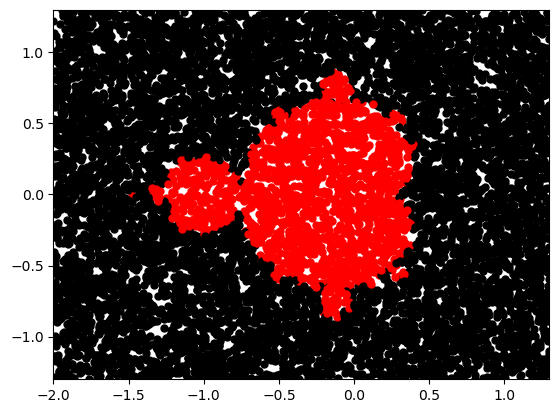

In [17]:
def visualize_points(ax):
    cx = np.random.uniform(-2, 1.3);
    cy = np.random.uniform(-1.3, 1.3);
    
    c = complex(cx, cy)
    ax.set_xlim(-2, 1.3)
    ax.set_ylim(-1.3, 1.3)
    max_iter = 100
    iterations, z_iter = iterate_map_c(c, 0, max_iter)
    if iterations < max_iter:
        ax.plot(cx, cy, 'k.', markersize=10)
    else:
        ax.plot(cx, cy, 'r.',  markersize=10)
    


fig, ax = plt.subplots()

for i in range(1, 10000):
    visualize_points(ax)
    #plt.pause(0.01)

plt.show()

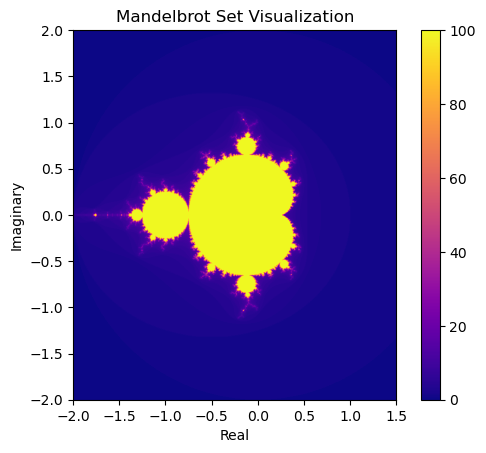

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def iterate_map(z, c, max_iter):
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2.0:
            return i
    return max_iter

def generate_fractal(width, height, x_min, x_max, y_min, y_max, max_iter):
    image = np.zeros((height, width))
    for y in range(height):
        for x in range(width):
            real = x_min + (x / (width - 1)) * (x_max - x_min)
            imag = y_min + (y / (height - 1)) * (y_max - y_min)
            c = complex(real, imag)
            iteration = iterate_map(0, c, max_iter)
            image[y, x] = iteration
    return image

def visualize_fractal(width, height, x_min, x_max, y_min, y_max, max_iter):
    fractal = generate_fractal(width, height, x_min, x_max, y_min, y_max, max_iter)
    
    plt.imshow(fractal, extent=(x_min, x_max, y_min, y_max), cmap='plasma', interpolation='bilinear')
    plt.title('Mandelbrot Set Visualization')
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.colorbar()
    plt.show()

# Parameters for the visualization
width = 800
height = 800
x_min, x_max = -2, 1.5
y_min, y_max = -2, 2
max_iter = 100

# Visualize the Mandelbrot set
visualize_fractal(width, height, x_min, x_max, y_min, y_max, max_iter)


## Julia set

The filled julia set consists of all the points whose orbit is bounded (i.e. does not diverge). The Julia set is the boundary of this region. 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def iterate_map(z, c, max_iter):
    for i in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return i
    return max_iter

def visualize_iterations_fixed_c(cx, cy, width, height, x_min, x_max, y_min, y_max, max_iter):
    image = np.zeros((height, width))
    c = complex(cx, cy)

    for y in range(height):
        for x in range(width):
            real = x_min + (x / (width - 1)) * (x_max - x_min)
            imag = y_min + (y / (height - 1)) * (y_max - y_min)
            z = complex(real, imag)
            iteration = iterate_map(z, c, max_iter)
            image[y, x] = iteration
           # if iteration < max_iter:
            #    image[y, x] = 0
           # else:
           #     image[y, x] = 1
    
    plt.imshow(image, extent=(x_min, x_max, y_min, y_max), cmap='twilight_shifted', interpolation='bilinear')
    #plt.imshow(image, extent=(x_min, x_max, y_min, y_max), interpolation='bilinear')

    plt.title(f'Iterations for c = {c}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.colorbar()
    plt.show()

# Parameters for the visualization
width = 800
height = 800
x_min, x_max = -2, 2
y_min, y_max = -2, 2
max_iter = 100

# Create sliders for cx and cy
slider_cx = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Re(c)')
slider_cy = widgets.FloatSlider(value=0, min=-1.3, max=1.3, step=0.1, description='Im(c)')

# Define the update function
def update_fixed_c(cx, cy):
    visualize_iterations_fixed_c(cx, cy, width, height, x_min, x_max, y_min, y_max, max_iter)

# Create an interactive widget
interact(update_fixed_c, cx=slider_cx, cy=slider_cy)


interactive(children=(FloatSlider(value=0.0, description='Re(c)', max=1.3, min=-1.3), FloatSlider(value=0.0, d…

<function __main__.update_fixed_c(cx, cy)>